<a href="https://colab.research.google.com/github/alhassan-alshareef/masar-curse/blob/main/Data_Cleaning_%26_Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Cleaning Techniques.

In [ ]:
#import the needed packages
import seaborn as sn
import pandas as pd

#read the data
file_path = '/content/dummy_data.csv'
data = pd.read_csv(file_path)

# let's explore the data

df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Verify data types
data_types = data.dtypes

# Check for duplicates
duplicates = data.duplicated().sum()

missing_values, data_types, duplicates

(age             0
 gender          0
 time_spent      0
 platform        0
 interests       0
 location        0
 demographics    0
 profession      0
 income          0
 indebt          0
 isHomeOwner     0
 Owns_Car        0
 dtype: int64,
 age              int64
 gender          object
 time_spent       int64
 platform        object
 interests       object
 location        object
 demographics    object
 profession      object
 income           int64
 indebt            bool
 isHomeOwner       bool
 Owns_Car          bool
 dtype: object,
 0)

In [ ]:
# Examine unique values in categorical columns
categorical_columns = ['gender', 'platform', 'interests', 'location', 'demographics', 'profession']
unique_values = {column: data[column].unique() for column in categorical_columns}

unique_values

{'gender': array(['male', 'female', 'non-binary'], dtype=object),
 'platform': array(['Instagram', 'Facebook', 'YouTube'], dtype=object),
 'interests': array(['Sports', 'Travel', 'Lifestlye'], dtype=object),
 'location': array(['United Kingdom', 'Australia', 'United States'], dtype=object),
 'demographics': array(['Urban', 'Sub_Urban', 'Rural'], dtype=object),
 'profession': array(['Software Engineer', 'Student', 'Marketer Manager'], dtype=object)}

In [ ]:
# Correct inconsistencies in categorical data
data['interests'] = data['interests'].replace({'Lifestlye': 'Lifestyle'})
data['demographics'] = data['demographics'].replace({'Sub_Urban': 'Suburban'})
data['profession'] = data['profession'].replace({'Marketer Manager': 'Marketing Manager'})

# Verify corrections by examining the unique values again
corrected_unique_values = {column: data[column].unique() for column in categorical_columns}

corrected_unique_values

{'gender': array(['male', 'female', 'non-binary'], dtype=object),
 'platform': array(['Instagram', 'Facebook', 'YouTube'], dtype=object),
 'interests': array(['Sports', 'Travel', 'Lifestyle'], dtype=object),
 'location': array(['United Kingdom', 'Australia', 'United States'], dtype=object),
 'demographics': array(['Urban', 'Suburban', 'Rural'], dtype=object),
 'profession': array(['Software Engineer', 'Student', 'Marketing Manager'], dtype=object)}

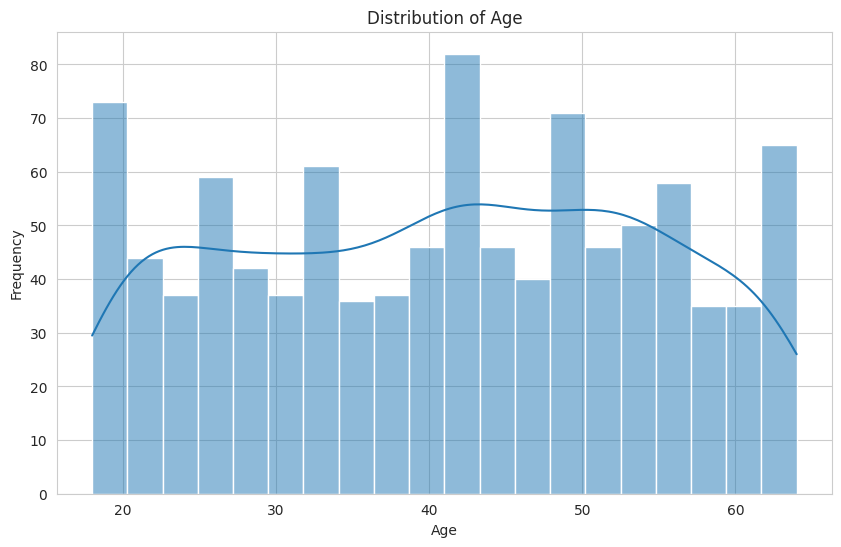

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-ff64a929b7c0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='time_spent', data=data, estimator=sum, ci=None)


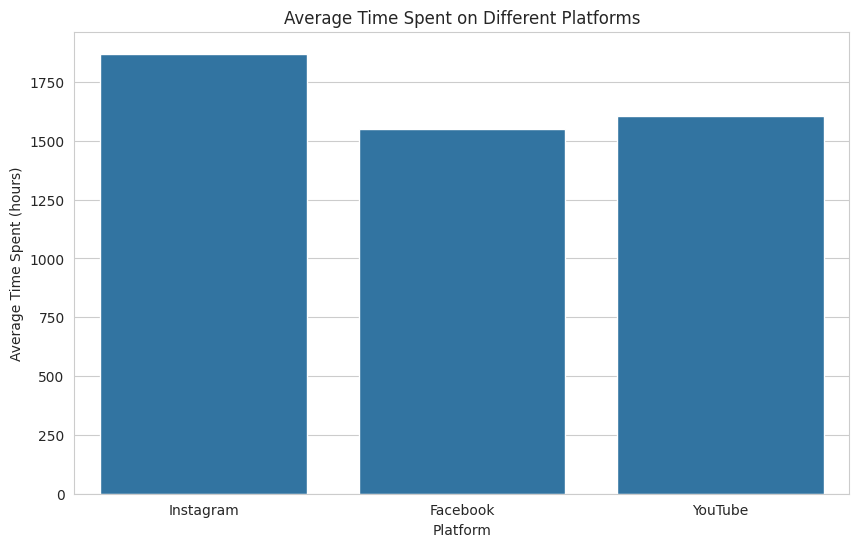

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='time_spent', data=data, estimator=sum, ci=None)
plt.title('Average Time Spent on Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Average Time Spent (hours)')
plt.show()

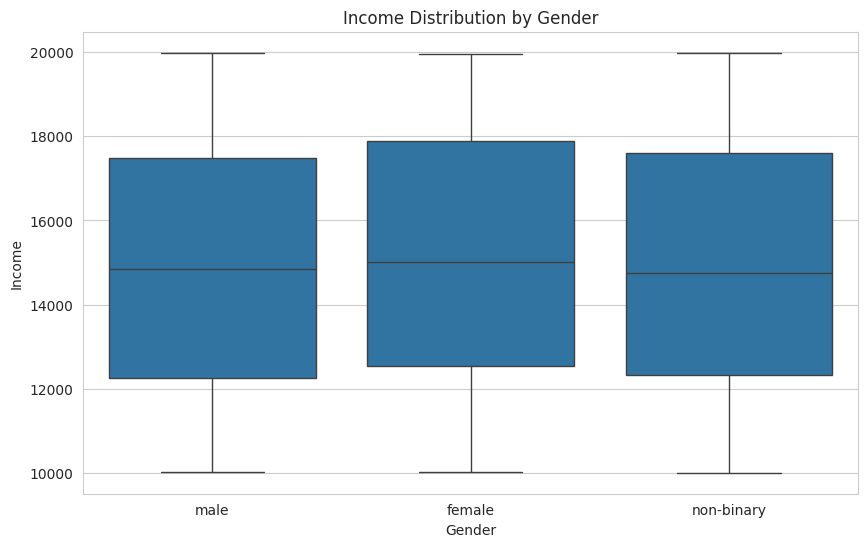

In [ ]:
# Create a box plot of income by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='income', data=data)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

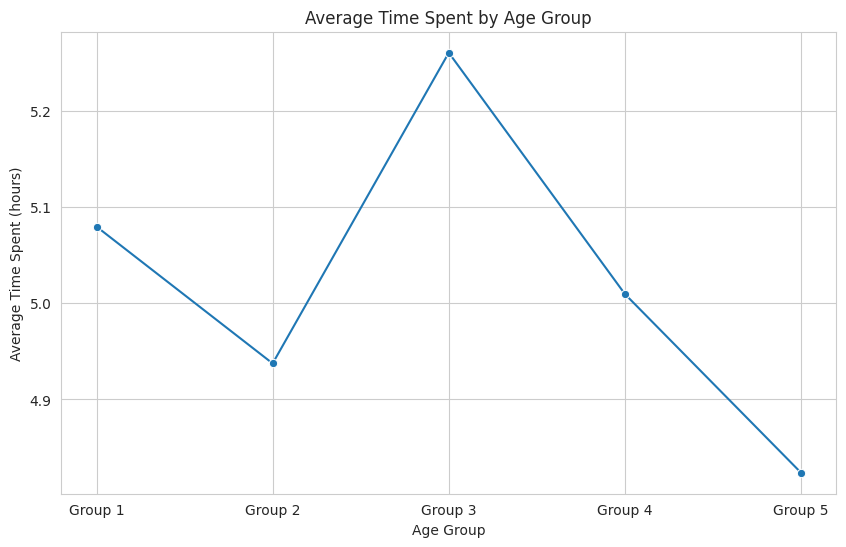

In [ ]:
# Bin ages into groups for a line chart
data['age_group'] = pd.cut(data['age'], bins=5, labels=False)

# Calculate the average time spent for each age group
age_group_time_spent = data.groupby('age_group')['time_spent'].mean().reset_index()

# Create a line chart of average time spent by age group
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='time_spent', data=age_group_time_spent, marker='o')
plt.title('Average Time Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Time Spent (hours)')
plt.xticks(ticks=age_group_time_spent['age_group'], labels=[f'Group {i+1}' for i in range(age_group_time_spent['age_group'].nunique())])
plt.show()

In [ ]:
max_values = data[['age', 'time_spent', 'income']].max()

max_values

age              64
time_spent        9
income        19980
dtype: int64

## Data Processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_cols = ['age', 'time_spent', 'income']
data_numerical = data[numerical_cols]

# Apply Min-Max normalization
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_numerical), columns=numerical_cols)

# Display the first few rows of the normalized data
data_normalized.head()

,age,time_spent,income
0,0.826087,0.250,0.979334
1,0.608696,0.125,0.055377
2,0.304348,0.875,0.325642
3,0.913043,0.500,0.249599
4,0.152174,0.000,0.456862


In [ ]:
# Calculate the average income by profession
average_income_by_profession = data.groupby('profession')['income'].mean().reset_index()

# Calculate the average time spent on platforms by location
average_time_spent_by_location = data.groupby('location')['time_spent'].mean().reset_index()

# Display the results
average_income_by_profession, average_time_spent_by_location

(          profession        income
 0  Marketing Manager  14927.335211
 1  Software Engineer  14876.511905
 2            Student  15265.731392,
          location  time_spent
 0       Australia    5.218750
 1  United Kingdom    4.908815
 2   United States    4.943574)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler normalization
data_standardized = pd.DataFrame(scaler.fit_transform(data_numerical), columns=numerical_cols)

# Display the first few rows of the standardized data
data_standardized.head()

,age,time_spent,income
0,1.112882,-0.799901,1.609380
1,0.371652,-1.194135,-1.505106
2,-0.666069,1.171269,-0.594094
3,1.409373,-0.011433,-0.850422
4,-1.184929,-1.588369,-0.151776


,age,time_spent,income
0,0.826087,0.250,0.979334
1,0.608696,0.125,0.055377
2,0.304348,0.875,0.325642
3,0.913043,0.500,0.249599
4,0.152174,0.000,0.456862


In [ ]:
# Replace 'female' with 0 and 'male' with 1 in the 'gender' column
data['gender'].replace({'female': 0, 'male': 1}, inplace=True)

# Display the first few rows to confirm the change
data[['gender', 'age', 'platform']].head()

,gender,age,platform
0,1,56,Instagram
1,0,46,Facebook
2,1,32,Instagram
3,non-binary,60,Instagram
4,1,25,Instagram


### Data aggregation

In [ ]:
# Create a sample DataFrame with example data
sample_data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Ethan'],
    'Age': [24, 30, 35, 22, 40],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male'],
    'Occupation': ['Data Scientist', 'Software Engineer', 'Graphic Designer', 'Product Manager', 'Data Analyst'],
    'Salary': [70000, 80000, 60000, 75000, 65000]
}

sample_df = pd.DataFrame(sample_data)

# Display the sample DataFrame
sample_df

,Name,Age,Gender,Occupation,Salary
0,Alice,24,Female,Data Scientist,70000
1,Bob,30,Male,Software Engineer,80000
2,Charlie,35,Male,Graphic Designer,60000
3,Diana,22,Female,Product Manager,75000
4,Ethan,40,Male,Data Analyst,65000


In [ ]:
# Group the data by 'Occupation' and calculate total and average salary
salary_stats_by_occupation = sample_df.groupby('Occupation')['Salary'].agg(['sum', 'mean']).reset_index().rename(columns={'sum': 'Total Salary', 'mean': 'Average Salary'})

# Display the calculated statistics
salary_stats_by_occupation

,Occupation,Total Salary,Average Salary
0,Data Analyst,65000,65000.0
1,Data Scientist,70000,70000.0
2,Graphic Designer,60000,60000.0
3,Product Manager,75000,75000.0
4,Software Engineer,80000,80000.0


### **Data Visualization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


large_sample_data = {
    'ID': range(1, 1001),  # IDs from 1 to 1000
    'Age': np.random.randint(18, 65, size=1000),  # Random ages between 18 and 65
    'Gender': np.random.choice(['Female', 'Male', 'Non-Binary'], size=1000),  # Random genders
    'Salary': np.random.randint(30000, 100000, size=1000),  # Random salaries between 30k and 100k
    'Occupation': np.random.choice(['Data Scientist', 'Software Engineer', 'Graphic Designer', 'Product Manager', 'Data Analyst'], size=1000),  # Random occupations
    'Hours Worked Per Week': np.random.randint(20, 60, size=1000)  # Random hours worked per week between 20 and 60
}

large_sample_df = pd.DataFrame(large_sample_data)

# Display the first few rows of the large sample DataFrame
large_sample_df.head()

,ID,Age,Gender,Salary,Occupation,Hours Worked Per Week
0,1,30,Non-Binary,91753,Product Manager,33
1,2,63,Male,47730,Data Scientist,21
2,3,21,Non-Binary,67330,Graphic Designer,51
3,4,50,Female,88752,Data Scientist,47
4,5,36,Non-Binary,40415,Data Scientist,47


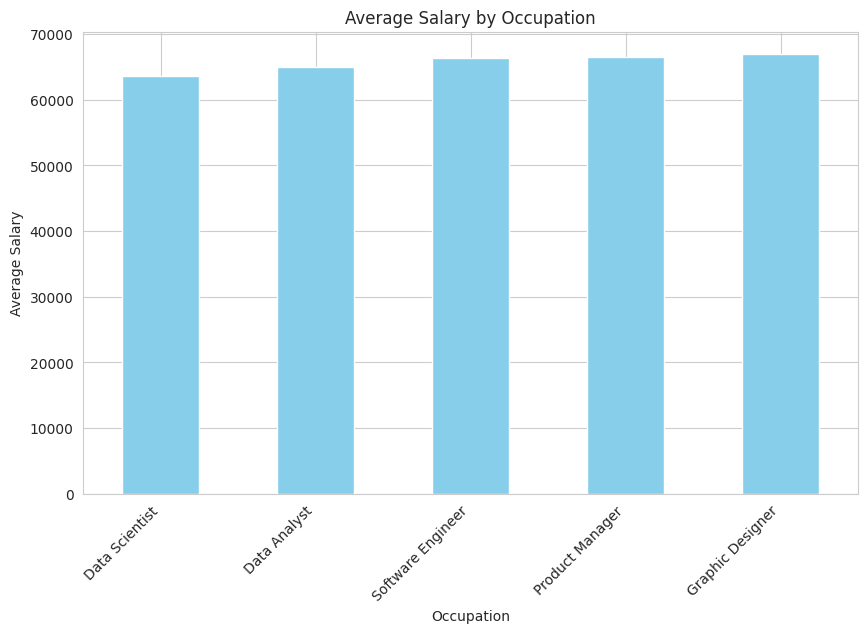

In [ ]:
# Bar Plot: Average Salary by Occupation
average_salary_by_occupation = large_sample_df.groupby('Occupation')['Salary'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_salary_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

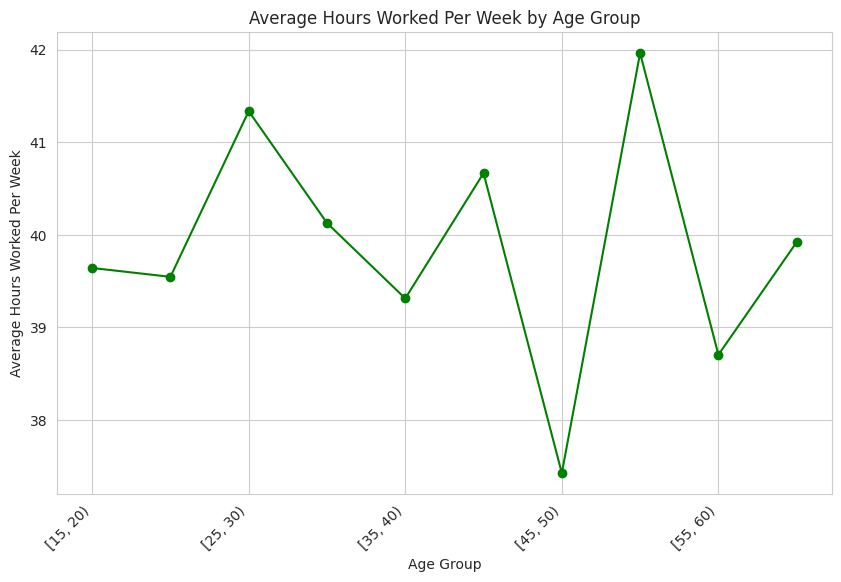

In [ ]:
large_sample_df['Age Group'] = pd.cut(large_sample_df['Age'], bins=range(15, 70, 5), right=False)

average_hours_by_age_group = large_sample_df.groupby('Age Group')['Hours Worked Per Week'].mean()

plt.figure(figsize=(10, 6))
average_hours_by_age_group.plot(kind='line', marker='o', color='green')
plt.title('Average Hours Worked Per Week by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours Worked Per Week')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

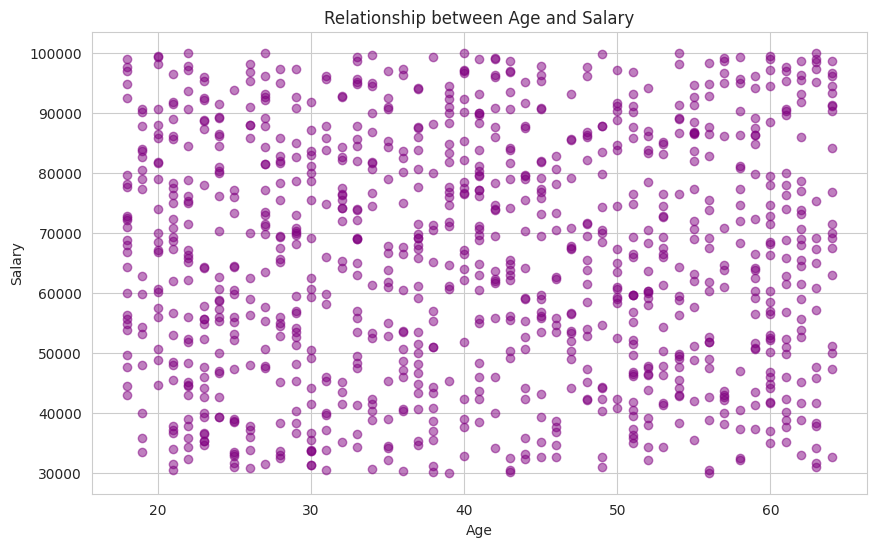

In [ ]:
# Scatter Plot: Relationship between Age and Salary
plt.figure(figsize=(10, 6))
plt.scatter(large_sample_df['Age'], large_sample_df['Salary'], alpha=0.5, color='purple')
plt.title('Relationship between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

# Interactive Scatter Plot: Relationship between Age and Salary using Plotly
fig = px.scatter(large_sample_df, x='Age', y='Salary',
                 title='Interactive Relationship between Age and Salary',
                 color='Occupation', # Color code points by occupation
                 hover_data=['Occupation', 'Gender']) # Additional info on hover

fig.show()